# Unit 3 Capstone
Bryan Corder
Mentor: Hoa Tran

## Introduction
For those in sales, one of the ways data science can provide actionable insights is through isolating reasons for customer churn. IBM has a data set on customer churn in the telecoms industry prospective companies can use with their deep learning software Watson. The problem with these unsupervised learning methods is while they provide good accuracy on predicting whether a customer will leave or not, they do not provide much insight in regards to the reasons why customers stay or go. Supervised Learning methods have the ability to provide such insights with their labelled data and through feature selection. The below project aims to gather insights in the IBM churn data set through feature selection and testing these features through various supervised learning models. 

## Data Set
The IBM data contains the following features: <br>
Customer ID = The key for the data. <br>
Gender = Male or Female (Categorical, binary)<br>
Senior Citizen = 0 (No) or 1 (Yes) (Categorical, binary)<br>
Dependents = No or Yes (Categorical, binary)<br>
Tenure = How long they have been a customer (Numerical, discrete)<br>
Phone Service = No or Yes (Categorical, binary)<br>
Multiple Lines = No, Yes, or 'No Phone Service' (Categorical)<br>
Internet Service = DSL, Fiber Optic, or No (Categorical)<br>
Online Security = No internet service, No, or Yes (Categorical)<br>
Online Backup = No internet service, No, or Yes (Categorical)<br>
Device Protection = No internet service, No, or Yes (Categorical) <br>
Tech Support = No internet service, No, or Yes (Categorical) <br>
Streaming TV = No internet service, No, or Yes (Categorical)<br> 
Streaming Movies = No internet service, No, or Yes (Categorical)<br>
Contract = Month-to-month, One year, or Two year (Categorical)<br>
Paperless Billing = No or Yes (Categorical, binary)<br>
PaymentMethod = Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic) (Categorical)<br>
Monthly Charges = How much the customer pays per month (Numerical, continuous)<br>
Total Charges = How much the customer pays annually (Numerical, continuous)<br>
Churn = Whether the customer stayed (= 0) or left (= 1) (Categorical, binary)<br>


## Data Import and Cleaning

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from datetime import datetime
main_start = datetime.now()
%matplotlib inline

First, let's import our customer churn data set and take a look at how it imports.

In [194]:
main_start = datetime.now()
raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

raw_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [195]:
# Let's take a look at the type of data in each column
data = raw_data.drop(['customerID'], axis=1)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [196]:
#It appears that Total Charges is coming in as a string, so let's make it numeric
data['TotalCharges'] = data['TotalCharges'].convert_objects(convert_numeric=True)

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [197]:
# Let's check the data for nulls
null_count = data.isnull().sum()
null_count[null_count>0]

TotalCharges    11
dtype: int64

In [198]:
# There appears to be 11 rows that are missing Total Charges. Since the number is insignificant, let's drop the rows.
data = data.dropna(axis=0)


In [199]:
#Get the values from our columns that are listed as strings
column_names = list(data.columns.values)

#Remove the int/float categories
del column_names[1]
del column_names[3]
del column_names[15]
del column_names[15]

for columns in column_names:
    print(columns,'\n', raw_data[columns].value_counts(), '\n')

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport 
 No                     3473
Yes                    20

In [200]:
#For the columns that only have 2 values yes or no, let's convert them to 0s and 1s
Yes_No_Columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for feature in Yes_No_Columns:
    data[feature] = np.where(data[feature].values == 'Yes', 1, 0)

#Now let's convert the Males/Females in 0 (Males) and 1 (Females)
data['gender'] = np.where(data.gender.values == 'Female', 1, 0)

#Let's see what we've created
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,1,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,0,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,1,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,1,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,0,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


The Dataframe looks nice, but it's hard to gather any insights from the data. Let's use count plots to see if we can pick up insights.

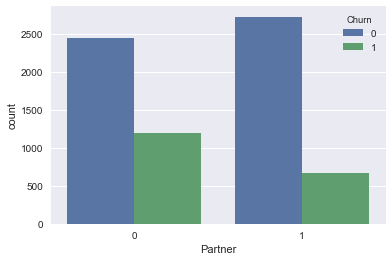

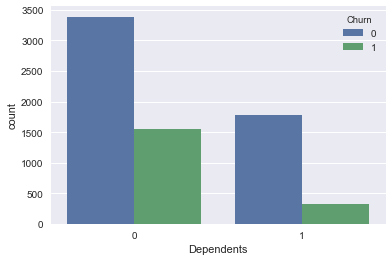

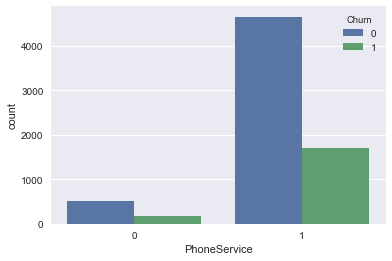

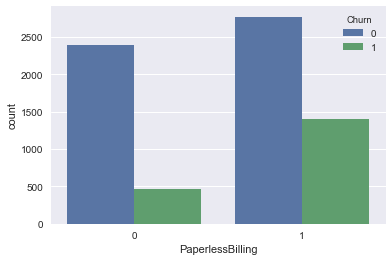

In [201]:
del Yes_No_Columns[4]
for feature in Yes_No_Columns:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.show()

From these visualizations, it appears that customers in the categories of without partners, without dependents, and who use paperless billing are more likely to leave. It'll be interesting to see if these categories end up in our final model.

Let's do the same for columns with multiple answers.

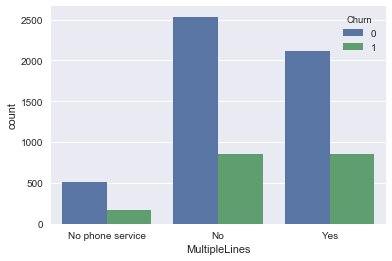

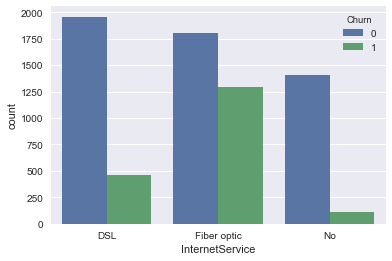

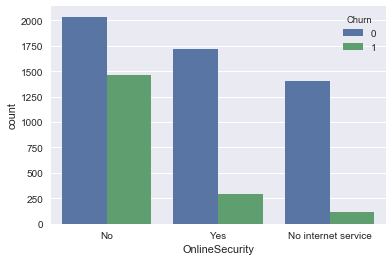

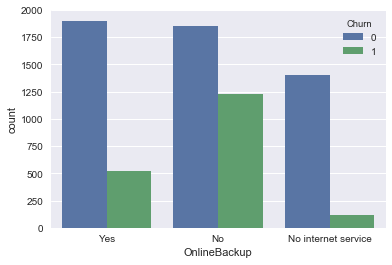

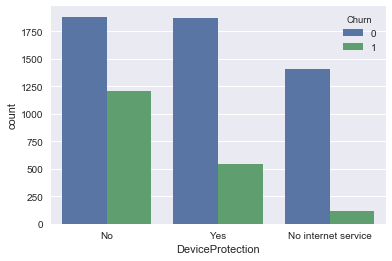

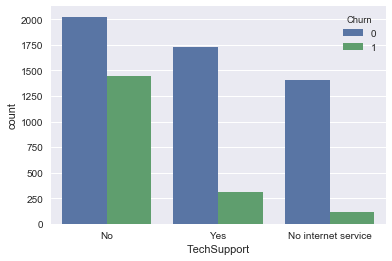

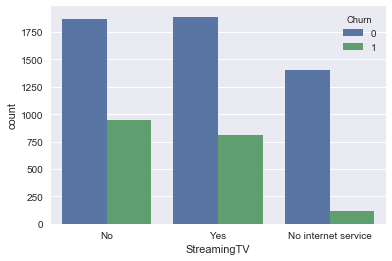

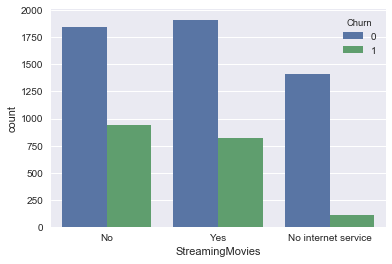

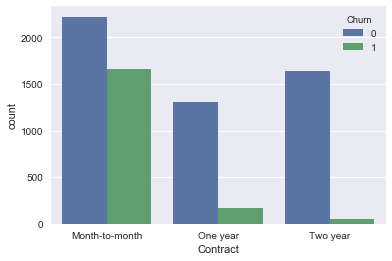

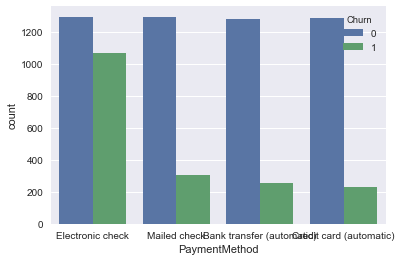

In [202]:
multiple_answers = ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
for feature in multiple_answers:
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.show()

From these visualizations, it appears that people with or without the following services are most likely to leave: Fiber Optic, No online security, No online backup, No device protection, No tech support, Month-to-month payment, and pay with Electronic Check. These categories are certainly ones to continue looking at as we go through the modeling.

In order for the computer to be able to use the features with multiple answers, let's convert them to dummies.

In [203]:
#Let's get dummies for the columns with multiple answers
data = pd.get_dummies(data, columns=multiple_answers)

In [204]:
#Now we can look at our 41 features.
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


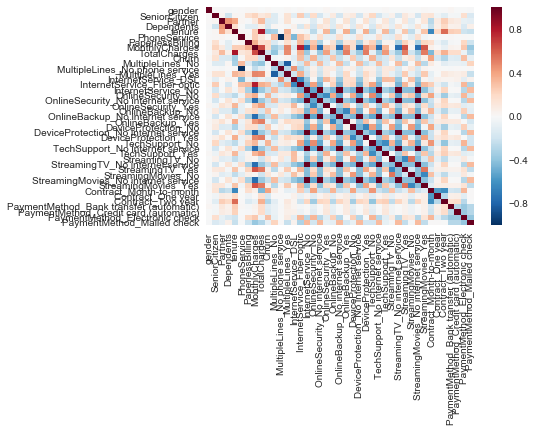

In [205]:
#Check their relationship with a heatmap
sns.heatmap(data.corr())

It appears there is little relationship between our variables outside of the inverse relationship with our dummy variables, which would make sense.

Let's create some models to see which features are most important for predicting churn.

## Build a Model

In [206]:
def basic_test(test):
    #Fit the models
    test.fit(X, y)
    #Generate the score
    print('Accuracy on the data with no feature selection: {}'.format(test.score(X, y)))
    print('\nCross Validation with 5 folds: {}'.format(cross_val_score(test, X, y, cv=5)) )

X = data.drop(['Churn'], 1)
y = data['Churn']

### Basic Models with No Manipulation
First let's try a number of models on the full data set without manipulation to see the accuracy of each model.

In [207]:
lr = LogisticRegression(C=9e9)
basic_test(lr)

Accuracy on the data with no feature selection: 0.8058873720136519

Cross Validation with 5 folds: [ 0.80312722  0.81165601  0.78962331  0.814367    0.80427046]


In [208]:
lr = LogisticRegression(C=1, penalty='l1')
basic_test(lr)
  

Accuracy on the data with no feature selection: 0.8064562002275313

Cross Validation with 5 folds: [ 0.80312722  0.81449893  0.79104478  0.80938834  0.80427046]


In [209]:
lr = LogisticRegression(C=1, penalty='l2')
basic_test(lr)

Accuracy on the data with no feature selection: 0.805745164960182

Cross Validation with 5 folds: [ 0.80312722  0.81236674  0.78962331  0.81507824  0.80498221]


In [210]:
neighbors = KNeighborsClassifier(n_neighbors=9)
basic_test(neighbors)

Accuracy on the data with no feature selection: 0.8114334470989761

Cross Validation with 5 folds: [ 0.77398721  0.78749112  0.77185501  0.77667141  0.78790036]


In [211]:
svc = SVC(C=1, gamma=0.1)
basic_test(svc)

Accuracy on the data with no feature selection: 0.9677189988623436

Cross Validation with 5 folds: [ 0.76190476  0.76972281  0.75479744  0.76386913  0.76654804]


In [212]:
clf = DecisionTreeClassifier()
basic_test(clf)

Accuracy on the data with no feature selection: 0.9974402730375427

Cross Validation with 5 folds: [ 0.71926084  0.73702914  0.72352523  0.71621622  0.73523132]


In [213]:
rfc = RandomForestClassifier()
basic_test(rfc)

Accuracy on the data with no feature selection: 0.9800910125142207

Cross Validation with 5 folds: [ 0.78820185  0.7782516   0.75906183  0.78236131  0.78932384]


In [214]:
clf = GradientBoostingClassifier()
basic_test(clf)

Accuracy on the data with no feature selection: 0.8257963594994312

Cross Validation with 5 folds: [ 0.81307747  0.81094527  0.7803838   0.81223329  0.80498221]


Our best models are scoring fairly well without any manipulation at around 80% accuracy. Let's try to isolate the important features of the 41 and improve our scores.

### Data Manipulation

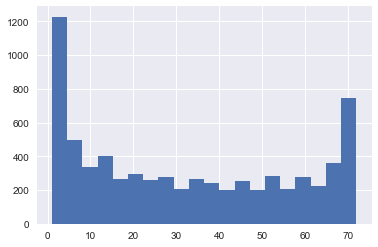

In [215]:
plt.hist(data['tenure'], bins=20)
plt.show()

In [216]:
"""data['tenure_reverse'] = 80 - data['tenure']
plt.hist(data['tenure_reverse'], bins=20)
plt.show()"""

"data['tenure_reverse'] = 80 - data['tenure']\nplt.hist(data['tenure_reverse'], bins=20)\nplt.show()"

In [217]:
"""data['tenure_reverse_sqrt'] = data['tenure_reverse'] ** (1/2)
plt.hist(data['tenure_reverse_sqrt'], bins=20)
plt.show()"""

"data['tenure_reverse_sqrt'] = data['tenure_reverse'] ** (1/2)\nplt.hist(data['tenure_reverse_sqrt'], bins=20)\nplt.show()"

In [218]:
"""data['tenure_log'] = np.log(data['tenure'])
plt.hist(data['tenure_log'], bins=20)
plt.show()"""

"data['tenure_log'] = np.log(data['tenure'])\nplt.hist(data['tenure_log'], bins=20)\nplt.show()"

In [219]:
"""threshold = 30
data['tenure_binary'] = np.where(data['tenure'] >= threshold, 1, 0)
data['tenure_binary'].value_counts()"""

"threshold = 30\ndata['tenure_binary'] = np.where(data['tenure'] >= threshold, 1, 0)\ndata['tenure_binary'].value_counts()"

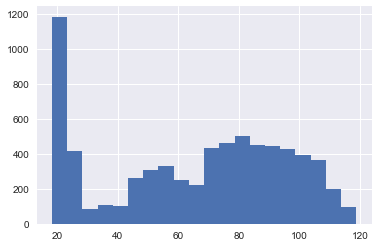

In [220]:
plt.hist(data['MonthlyCharges'], bins=20)
plt.show()

In [221]:
"""threshold = 50.0
data['expensive'] = np.where(data['MonthlyCharges'] >= threshold, 1, 0)
data['expensive'].value_counts()"""

"threshold = 50.0\ndata['expensive'] = np.where(data['MonthlyCharges'] >= threshold, 1, 0)\ndata['expensive'].value_counts()"

In [222]:
"""data['MonthlyCharges_log'] = np.log10(data['MonthlyCharges'])
plt.hist(data['MonthlyCharges_log'], bins=20)
plt.show()"""

"data['MonthlyCharges_log'] = np.log10(data['MonthlyCharges'])\nplt.hist(data['MonthlyCharges_log'], bins=20)\nplt.show()"

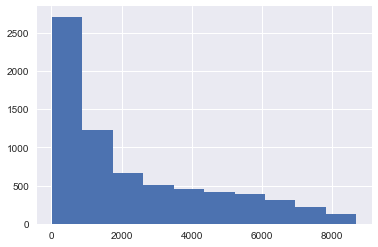

In [223]:
plt.hist(data['TotalCharges'], bins=10)
plt.show()

In [224]:
"""data['TotalCharges_sqrt'] = data['TotalCharges'] ** (1/2)
plt.hist(data['TotalCharges_sqrt'], bins=20)
plt.show()"""

"data['TotalCharges_sqrt'] = data['TotalCharges'] ** (1/2)\nplt.hist(data['TotalCharges_sqrt'], bins=20)\nplt.show()"

In [225]:
data['tenure_norm'] = (data['tenure'] - min(data['tenure']))/ (max(data['tenure']) - min(data['tenure']))

In [226]:
data['MonthlyCharges_norm'] = (data['MonthlyCharges'] - min(data['MonthlyCharges']))/ (max(data['MonthlyCharges']) - min(data['MonthlyCharges']))

In [227]:
data['TotalCharges_norm'] = (data['TotalCharges'] - min(data['TotalCharges']))/ (max(data['TotalCharges']) - min(data['TotalCharges']))

In [228]:
model_data = data.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)

Now that we have some new features, let's balance our data to improve the performance of our modeling for predictions.

In [229]:
# Create a separate yes and no variable
yes_churn = model_data[model_data.Churn == 1]
no_churn = model_data[model_data.Churn == 0]

# Use resample to get an equal number of yes and nos in our data
model_data = resample(no_churn, n_samples=1869)
model_data = model_data.append(yes_churn)

# Now we can create our X and Y variables
X = model_data.drop(['Churn'], 1)
y = model_data['Churn']

#Make a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Selection
Principle Components Analysis works in a blackbox fashion, so it won't help us in isolating features important to predicting whether a customer will stay or leave, but let's include it to see if we can improve the performance of the models in predicting by cancelling out the noise of the 41 features.

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


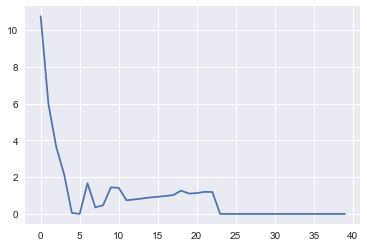

In [230]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(X_train)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

In [231]:
#Set up our first X using PCA
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X_train)
PCA_X = pd.DataFrame(X_std_pca)

#Now for the Test
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X_test)
PCA_Xtest = pd.DataFrame(X_std_pca)

SK Learn has a powerful tool that allows us to use Cross Validation to isolate the features that are most important in prediction called Recursive Feature Elimination.

In [232]:
start = datetime.now()
#Use Lasso/RFE with Cross Validation to get the best features for our second X
lr = LogisticRegression(C=1, penalty='l1')

#Set up our X,y
X = X_train
y = y_train

#Set up our Recursive Feature Elimination
rfe = RFECV(lr,cv=5) 
fit = rfe.fit(X,y)
result_RFE = pd.DataFrame(list(zip(X.head(0), rfe.ranking_, rfe.support_)),
                          columns=['Features','Ranking','Support'] ) 
print(result_RFE.sort_values('Ranking'))
print('It took the following time to complete this task:', datetime.now() - start)

                                   Features  Ranking  Support
39                        TotalCharges_norm        1     True
18                      DeviceProtection_No        1     True
29                      StreamingMovies_Yes        1     True
30                  Contract_Month-to-month        1     True
13       OnlineSecurity_No internet service        1     True
12                        OnlineSecurity_No        1     True
32                        Contract_Two year        1     True
9                       InternetService_DSL        1     True
10              InternetService_Fiber optic        1     True
35           PaymentMethod_Electronic check        1     True
6                          MultipleLines_No        1     True
5                          PaperlessBilling        1     True
4                              PhoneService        1     True
37                              tenure_norm        1     True
1                             SeniorCitizen        1     True
21      

In [233]:
true_values = result_RFE[result_RFE.Support == True]
feature_list = []
for g in true_values['Features']:
    feature_list.append(g)

In [234]:
RFE_X = X_train[feature_list]
RFE_Xtest = X_test[feature_list]

Let's use Random Forest to select features

In [235]:
# Let's use Random Forest to select features.
start = datetime.now()
X = X_train
y = y_train
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
df2 = X.columns.get_values()
feat_labels = df2.tolist()

# Train the classifier
clf.fit(X, y)
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
for feature in zip(X, clf.feature_importances_):
    print(feature)

print('It took the following time to complete this task:', datetime.now() - start)

('gender', 0.024654934024994177)
('SeniorCitizen', 0.018573785019691848)
('Partner', 0.020871828831393175)
('Dependents', 0.01923081926469641)
('PhoneService', 0.0041646619740171691)
('PaperlessBilling', 0.024003115346111013)
('MultipleLines_No', 0.013300313636536762)
('MultipleLines_No phone service', 0.0040988858522566438)
('MultipleLines_Yes', 0.012507851007732032)
('InternetService_DSL', 0.012405778983894743)
('InternetService_Fiber optic', 0.029212111992994283)
('InternetService_No', 0.0034653902780610725)
('OnlineSecurity_No', 0.030336878479392336)
('OnlineSecurity_No internet service', 0.0034231998296426168)
('OnlineSecurity_Yes', 0.011408451281472705)
('OnlineBackup_No', 0.017544575224220395)
('OnlineBackup_No internet service', 0.0034919239779266161)
('OnlineBackup_Yes', 0.012080613865227669)
('DeviceProtection_No', 0.016513764251623743)
('DeviceProtection_No internet service', 0.0038410331991189728)
('DeviceProtection_Yes', 0.011397013631217187)
('TechSupport_No', 0.032515920

This is very insightful because we can use the "feature_importances_" to see just how important each feature is in predicting whether a customer will leave or not.

In [236]:
start = datetime.now()

# Retrieve the most important features by using SelectFromModel with a given threshold 
sfm = SelectFromModel(clf, threshold=0.03)
rfcfeature_list =[]
# Train the selector
sfm.fit(X, y)
for feature_list_index in sfm.get_support(indices=True):
    rfcfeature_list.append(feat_labels[feature_list_index])
    print(feat_labels[feature_list_index])

RFC_X = X_train[rfcfeature_list]
RFC_Xtest = X_test[rfcfeature_list]
     
print('Number of features in this list: {}'.format(len(rfcfeature_list)))
print('It took the following time to complete this task:', datetime.now() - start)

OnlineSecurity_No
TechSupport_No
Contract_Month-to-month
Contract_Two year
tenure_norm
MonthlyCharges_norm
TotalCharges_norm
Number of features in this list: 7
It took the following time to complete this task: 0:00:02.552689


### Run Models
First let's create a dataframe to store the results.

In [237]:
#Make a list to store our results for a comparison at the end
results = pd.DataFrame(index=range(24))
results['Model'] = ['Logistic Regression',
                    'Logistic Regression',
                    'Logistic Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Lasso Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'Ridge Regression',
                    'KNN', 'KNN', 'KNN',
                    'SVC', 'SVC', 'SVC',
                    'Decision Tree', 'Decision Tree', 'Decision Tree',
                    'Random Forest',
                    'Random Forest',
                    'Random Forest',
                    'Gradient Booster',
                    'Gradient Booster',
                    'Gradient Booster',
                    ]
results['Feature Selection'] = ['PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                                'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest',
                               'PCA', 'RFECV', 'Random Forest']


Train_Score = []
Test_Score = []
Cross_Validation = []
fold1 = []
fold2 = []
fold3 = []
fold4 = []
fold5 = []

Now let's create a testing function so that all we have to do is set the test and its parameters to run the test and store the results.

In [238]:
#Create a testing function that will fit the test with PCA and our selected features from both RFECV and Random Forest
def testing_func(test):
    # This is a local list used to temporarily store scores
    scores=[]
    # This list serves the For loop below putting the variables in
    models = [[PCA_X, y], [PCA_Xtest, y_test], [RFE_X, y],[RFE_Xtest, y_test], [RFC_X, y], [RFC_Xtest, y_test]]
    for x in models:
        test.fit(x[0], x[1])
        scores.append(test.score(x[0], x[1]))
    
    #Let's store the results from our local list into the main list
    Train_Score.append(scores[0])
    Train_Score.append(scores[2])
    Train_Score.append(scores[4])
    Test_Score.append(scores[1])
    Test_Score.append(scores[3])
    Test_Score.append(scores[5])

    # Create a local dataframe to display our results cleanly
    df=pd.DataFrame(scores, columns=['Accuracy'], index=['PCA Training', 'PCA Test', 'RFECV Training', 'RFECV Test', 
                                                         'Random Forest Training' , 'Random Forest Test'])
    print(df)
    
    #Create a list and put it through a For loop to do the Cross Validation
    exes = [[PCA_X, 'PCA'], [RFE_X, 'RFECV'], [RFC_X, 'Random Forest']]
    for x in exes:
        Cross_Validation0 = cross_val_score(test, x[0], y, cv=5)
        Cross_Validation.append(Cross_Validation0)
        
        #Divide up the results into 5 different folds for display
        fold1.append(Cross_Validation0[0])
        fold2.append(Cross_Validation0[1])
        fold3.append(Cross_Validation0[2])
        fold4.append(Cross_Validation0[3])
        fold5.append(Cross_Validation0[4])
        print('\nCross Validation Score with 5 folds with {}:\n{}'.format(x[1], Cross_Validation0))
    

From this point, we'll cycle through the models first setting the hyperparameters and then putting them through the function. There also is a timestamp on each one to gauge how much processing time is required for each model. The processing time isn't critical for this question, but could be critical in other situations. This study will be looking for accuracy over efficiency.

In [239]:
start = datetime.now()
#Let's compare our features in various models starting with Logistic Regression
lr = LogisticRegression(C=9e9)
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.757188
PCA Test                0.754457
RFECV Training          0.778355
RFECV Test              0.758509
Random Forest Training  0.766374
Random Forest Test      0.752836

Cross Validation Score with 5 folds with PCA:
[ 0.75099602  0.76294821  0.748       0.728       0.79      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.78685259  0.80079681  0.738       0.744       0.798     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.77290837  0.78685259  0.738       0.75        0.778     ]
It took the following time to complete this task: 0:00:00.156010


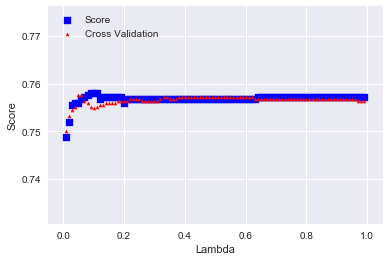

In [240]:
# Try to figure out the best Lambda for Lasso by running the test with the PCA X variable and mapping them out.
# This is the range of Lambdas we'll look at.
numb = np.arange(0.01, 1, 0.01)

# Temporary lists to store the results
yl = []
cl = []

# For loop to run the model with different Lambdas represented as L
for l in numb:
    lr = LogisticRegression(C=l, penalty='l1')
    lr.fit(PCA_X, y)
    yl.append(lr.score(PCA_X, y))
    cl.append(np.mean(cross_val_score(lr, PCA_X, y, cv=5)))

# Plot the results of the accuracy and Cross Validation Score
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yl, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cl, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

In [241]:
# The accuracy goes up along with the CV score and levels off around 0.6. Let's use 1.
start = datetime.now()
lr = LogisticRegression(C=1, penalty='l1')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.757188
PCA Test                0.755267
RFECV Training          0.775958
RFECV Test              0.762561
Random Forest Training  0.764377
Random Forest Test      0.752836

Cross Validation Score with 5 folds with PCA:
[ 0.75099602  0.76494024  0.748       0.728       0.79      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.79282869  0.79880478  0.742       0.758       0.8       ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.7689243   0.78087649  0.738       0.75        0.778     ]
It took the following time to complete this task: 0:00:00.205004


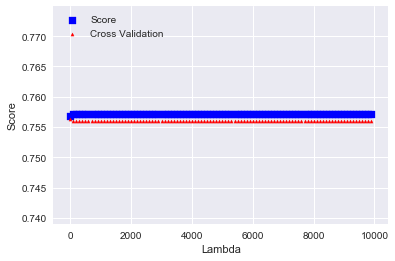

In [242]:
# Repeat the process for Ridge Regression
numb = np.arange(1, 10000, 100)
# Same kind of temporary list.
yr = []
cr = []
#Run the Lambdas as l through the model using the PCA_X
for l in numb:
    lr = LogisticRegression(C=l, penalty='l2')
    lr.fit(PCA_X, y)
    yr.append(lr.score(PCA_X, y))
    cr.append(np.mean(cross_val_score(lr, PCA_X, y, cv=5)))

# Plot the results.
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Lambda')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yr, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cr, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

In [243]:
#It's a flat line across the board, so we'll use 1.
start = datetime.now()
lr = LogisticRegression(C=1, penalty='l2')
testing_func(lr)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.756789
PCA Test                0.755267
RFECV Training          0.776358
RFECV Test              0.759319
Random Forest Training  0.763578
Random Forest Test      0.749595

Cross Validation Score with 5 folds with PCA:
[ 0.75099602  0.76494024  0.748       0.728       0.79      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.79282869  0.79282869  0.744       0.752       0.798     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.7689243   0.78087649  0.734       0.742       0.78      ]
It took the following time to complete this task: 0:00:00.147973


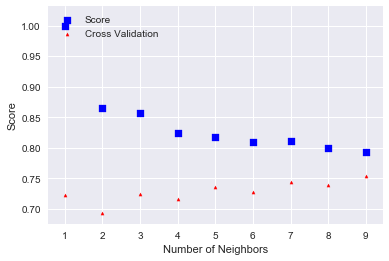

It took the following time to complete this task: 0:00:00.492843


In [244]:
# This runs the same kind of optimization analysis on KNN.
numb = np.arange(1, 10, 1)
start = datetime.now()
# Temporary lists to store the results
yn = []
cv = []

# Run the model with number of neighbors as n again using the PCA_X.
for n in numb:
    neighbors = KNeighborsClassifier(n_neighbors=n)
    neighbors.fit(PCA_X, y)
    yn.append(neighbors.score(PCA_X, y))
    cv.append(np.mean(cross_val_score(neighbors, PCA_X, y, cv=5)))

# Plot the results
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
ax1.scatter(x=numb, y=yn, c='b', marker="s", label='Score')
ax1.scatter(x=numb, y=cv, s=10, c='r', marker="^", label='Cross Validation')
plt.legend(loc='upper left');
plt.show()

print('It took the following time to complete this task:', datetime.now() - start)

In [245]:
# The accuracy steadily declines, but it is becoming less overfitted while the CV score remains steady. Let's use 9.
start = datetime.now()
neighbors = KNeighborsClassifier(n_neighbors=9)
testing_func(neighbors)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.793930
PCA Test                0.778768
RFECV Training          0.781949
RFECV Test              0.784441
Random Forest Training  0.799521
Random Forest Test      0.785251

Cross Validation Score with 5 folds with PCA:
[ 0.77689243  0.75697211  0.73        0.734       0.77      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.77091633  0.75697211  0.734       0.722       0.764     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.7749004   0.78286853  0.738       0.738       0.75      ]
It took the following time to complete this task: 0:00:00.456446


In [246]:
# SKlearn has a tool that will optimize SVC
svc = SVC()
# Set the hyperparameters
parameters = {'C':[1,2,3,4,5], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10]}
# Run it through the tool.
grid = GridSearchCV(svc, parameters).fit(RFE_X, y)
predicted = grid.predict(RFE_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

The best parameters are {'C': 2, 'gamma': 0.1} with a score of %0.7623801916932907


In [247]:
# Utilizing the results from above, we can run SVC aimed at the highest CV score.
start = datetime.now()
svc = SVC(C=parameters['C'], gamma=parameters['gamma'])
testing_func(svc)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.756789
PCA Test                0.752836
RFECV Training          0.767971
RFECV Test              0.760940
Random Forest Training  0.758786
Random Forest Test      0.743112

Cross Validation Score with 5 folds with PCA:
[ 0.76294821  0.77091633  0.742       0.708       0.78      ]

Cross Validation Score with 5 folds with RFECV:
[ 0.76494024  0.79681275  0.746       0.752       0.768     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.76095618  0.78087649  0.744       0.734       0.758     ]
It took the following time to complete this task: 0:00:02.095971


In [248]:
# Run the same optimization tool on Decision Tree.

start = datetime.now()
clf = DecisionTreeClassifier()
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(clf, parameters).fit(PCA_X, y)
predicted = grid.predict(PCA_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_

print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'max_depth': 7} with a score of %0.7519968051118211
It took the following time to complete this task: 0:00:00.200252


In [249]:
# Run the selected hyperparameters from above.
start = datetime.now()
clf = DecisionTreeClassifier(max_depth=parameters['max_depth'], 
                             random_state=42)
testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.825080
PCA Test                0.837925
RFECV Training          0.817891
RFECV Test              0.833874
Random Forest Training  0.809105
Random Forest Test      0.841977

Cross Validation Score with 5 folds with PCA:
[ 0.75896414  0.73306773  0.736       0.738       0.752     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.76294821  0.73505976  0.72        0.74        0.77      ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.75099602  0.75697211  0.718       0.744       0.748     ]
It took the following time to complete this task: 0:00:00.148677


In [250]:
#Run the same optimization tool for Random Forest.

start = datetime.now()
rfc = RandomForestClassifier()
parameters = {'n_estimators':[10, 100, 1000, 10000], 'max_depth':[2,4,6,8,10]}
grid = GridSearchCV(rfc, parameters).fit(RFE_X, y)
predicted = grid.predict(RFE_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_
print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'max_depth': 6, 'n_estimators': 1000} with a score of %0.7675718849840255
It took the following time to complete this task: 0:56:25.044713


In [251]:
# Run Random Forest using the parameters selected above.
start = datetime.now()
rfc = RandomForestClassifier(n_estimators=parameters['n_estimators'], 
                             max_depth=parameters['max_depth'], 
                             min_samples_leaf=1, 
                             max_leaf_nodes=4)

testing_func(rfc)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.761182
PCA Test                0.745543
RFECV Training          0.764776
RFECV Test              0.755267
Random Forest Training  0.765176
Random Forest Test      0.756078

Cross Validation Score with 5 folds with PCA:
[ 0.7689243   0.75498008  0.746       0.726       0.768     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.76294821  0.79083665  0.756       0.74        0.772     ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.76494024  0.77290837  0.752       0.73        0.766     ]
It took the following time to complete this task: 0:31:06.717894


In [252]:
# Run the same optimization tool for gradient boosting
start = datetime.now()
clf = GradientBoostingClassifier()
parameters = {'n_estimators':[1, 10, 100, 1000], 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
              'max_depth':[2,4,6,8,10]}
grid = GridSearchCV(clf, parameters).fit(RFE_X, y)
predicted = grid.predict(RFE_Xtest)
print("The best parameters are {} with a score of %{}".format(grid.best_params_, grid.best_score_))

#Put those parameters in a dictionary to call.
parameters = grid.best_params_
print('It took the following time to complete this task:', datetime.now() - start)

The best parameters are {'learning_rate': 0.75, 'max_depth': 2, 'n_estimators': 10} with a score of %0.777555910543131
It took the following time to complete this task: 1:38:10.037426


In [253]:
# Run Gradient Boosting using the above.
start = datetime.now()
clf = GradientBoostingClassifier(loss='exponential', learning_rate=parameters['learning_rate'], 
                                 n_estimators=parameters['n_estimators'], subsample=0.75, 
                                 max_depth=parameters['max_depth'])

testing_func(clf)

print('It took the following time to complete this task:', datetime.now() - start)

                        Accuracy
PCA Training            0.770767
PCA Test                0.768233
RFECV Training          0.778754
RFECV Test              0.780389
Random Forest Training  0.776757
Random Forest Test      0.777147

Cross Validation Score with 5 folds with PCA:
[ 0.77290837  0.75697211  0.76        0.72        0.786     ]

Cross Validation Score with 5 folds with RFECV:
[ 0.79880478  0.7749004   0.754       0.738       0.79      ]

Cross Validation Score with 5 folds with Random Forest:
[ 0.7749004   0.78087649  0.742       0.724       0.776     ]
It took the following time to complete this task: 0:00:00.282303


## Results

In [254]:
# Display our results cleanly
results2 = pd.DataFrame({'Train Score': Train_Score, 'Test Score': Test_Score, 'CV Fold 1': fold1,
                            'CV Fold 2': fold2, 'CV Fold 3': fold3, 'CV Fold 4': fold4, 'CV Fold 5': fold5})
results2['CV Mean'] = (results2['CV Fold 1'] + results2['CV Fold 2'] + results2['CV Fold 3'] + 
                       results2['CV Fold 4'] + results2['CV Fold 5']) / 5
results = pd.concat([results, results2], axis=1)

results.head(24)

,Model,Feature Selection,CV Fold 1,CV Fold 2,CV Fold 3,CV Fold 4,CV Fold 5,Test Score,Train Score,CV Mean
0,Logistic Regression,PCA,0.750996,0.762948,0.748,0.728,0.790,0.754457,0.757188,0.755989
1,Logistic Regression,RFECV,0.786853,0.800797,0.738,0.744,0.798,0.758509,0.778355,0.773530
2,Logistic Regression,Random Forest,0.772908,0.786853,0.738,0.750,0.778,0.752836,0.766374,0.765152
3,Lasso Regression,PCA,0.750996,0.764940,0.748,0.728,0.790,0.755267,0.757188,0.756387
4,Lasso Regression,RFECV,0.792829,0.798805,0.742,0.758,0.800,0.762561,0.775958,0.778327
5,Lasso Regression,Random Forest,0.768924,0.780876,0.738,0.750,0.778,0.752836,0.764377,0.763160
6,Ridge Regression,PCA,0.750996,0.764940,0.748,0.728,0.790,0.755267,0.756789,0.756387
7,Ridge Regression,RFECV,0.792829,0.792829,0.744,0.752,0.798,0.759319,0.776358,0.775931
8,Ridge Regression,Random Forest,0.768924,0.780876,0.734,0.742,0.780,0.749595,0.763578,0.761160
9,KNN,PCA,0.776892,0.756972,0.730,0.734,0.770,0.778768,0.793930,0.753573


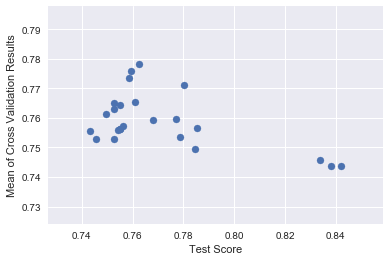

In [255]:
# Plot them. Our goal is the get as many points in the upper right hand corner as possible.
x = results['Test Score']
y = results['CV Mean']
plt.xlabel('Test Score')
plt.ylabel('Mean of Cross Validation Results')
plt.scatter(x, y)
plt.show()

The best performer of the models was the Gradient Boosting Classifier using features generated by Recursive Feature Elimination, which scored roughly the same as the running the model. Gradient Boosting with features generated by Random Forest (feature importance) scored very close to the features selected by RFECV. This is important to the goal of isolating important factors in determining whether a customer stays or goes because unlike PCA and many of the unsupervised learning methods, we can see inside the box and know why the computer is making its prediction. This means that action items can be drawn from the results. While an accuracy of 80% is not the strongest predictors, it is still accurate enough to give a company some confidence in choosing where to put its marketing dollars since marketing budgets don't need the accuracy of brain surgeons performing life-saving procedures.

## Recommendations
From the above results, one could recommend putting an extra effort in getting customers without features such as online or tech support to sign up for these features. Those who are subscribed to those features, it appears, tend to stay with the company longer than those who don't. Also, it would be adviseable to the company to try to get those who pay with electronic check (not an automatic payment) to switch to an automatic payment type such as auto-withdrawal or a credit card on file. It is pretty logical that a person who signs up for autopayment and forgets about the payment each month until he or she sees it on a bank statement will be less likely to quit the service than someone who has to remember to send an electronic check every month to make the payment. The above model corroborates this hypothesis.

## Considerations for Improvement
First and foremost, this is only 6,000 lines of data and it's not quite clear how this data was derived from the larger population. Having the whole data set would provide more instances for the training/testing set and give the model more confidence with the larger sample size.

Second, it would be helpful to have even partial data regarding the reasons given for canceling the service. When someone cancels their telecom service, that person needs to speak to a customer rep to do so. When the customer rep takes such a call, the customer rep asks why the person is quitting (this also gives the company a chance to negotiate with the customer to retain the customer through lower rates or other incentives). It could be that people who are on month-to-month contracts are temporarily living in an apartment on a work or assignment or after separating from a spouse and so the person quitting the service could not be retained no matter what advertisements or marketing campaign the company invested in. Adding this field would give color to the data and make more insightful recommendations.

## From Here
This data set is just one example of how data science can be used to guide business decisions based on consumer behavior. While this data set was in telecoms, the same methodology could be used in other sectors to gain insights on which customers were most likely to leave in order to provide some guidance to those sales representatives. Much is said about how machine learning will replace people, and while that may be the case in the future, at the moment it can provide powerful insights to improve the performance of people and studies like these should be done using data sets from different industries to achieve that performance boost.